<a href="https://colab.research.google.com/github/Yu-Hayung/Python-Machine-Learning-and-Deep-Learning/blob/main/8_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망(CNN)의 구성 요소

## 합성곱

완전 연결 신경망과 달리 뉴런을 필터 라고 부른다. 혹은 커널 이라고 부른다. 


커널이 필터를 직을 횟수를 늘려주기 위해서 입력 배열 주변을 가상의 원소로 채우는 것을 패딩이라고 한다. (보통 패딩 = 0)



## 패션 MNIST 데이터 불러오기 

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기 

In [5]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28, 28, 1)))

model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)              

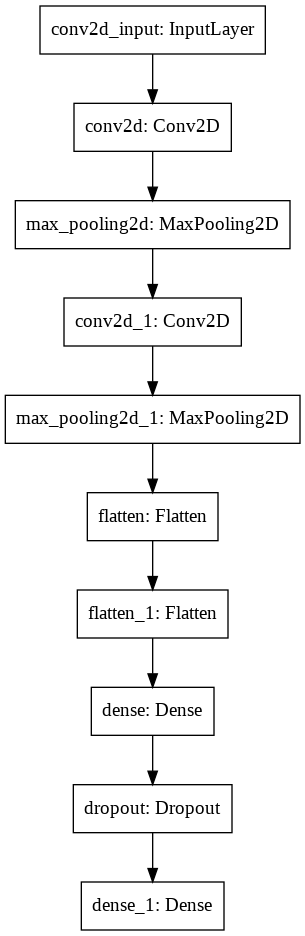

In [9]:
keras.utils.plot_model(model)

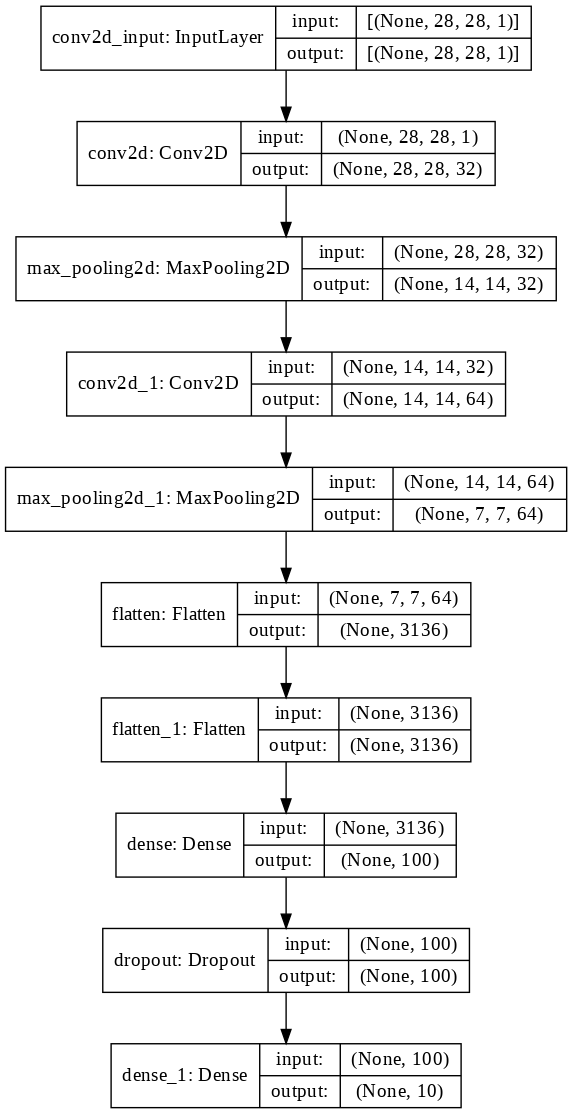

In [11]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi = 100)

## 모델 컴파일과 훈련 

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 61s 40ms/step - loss: 0.5230 - accuracy: 0.8145 - val_loss: 0.3253 - val_accuracy: 0.8813
Epoch 2/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.3486 - accuracy: 0.8760 - val_loss: 0.2782 - val_accuracy: 0.8960
Epoch 3/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.3000 - accuracy: 0.8932 - val_loss: 0.2597 - val_accuracy: 0.9037
Epoch 4/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2678 - accuracy: 0.9023 - val_loss: 0.2561 - val_accuracy: 0.9063
Epoch 5/20
1500/1500 [==============================] - 61s 40ms/step - loss: 0.2436 - accuracy: 0.9119 - val_loss: 0.2358 - val_accuracy: 0.9128
Epoch 6/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2220 - accuracy: 0.9180 - val_loss: 0.2334 - val_accuracy: 0.9139
Epoch 7/20
1500/1500 [==============================] - 61s 40ms/step - loss: 0.2076 - accuracy: 0.9222 - val_loss: 0.2266 -

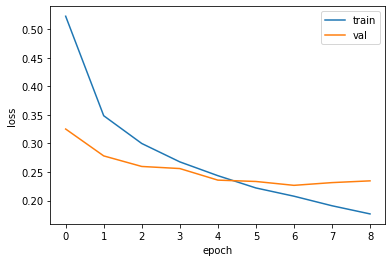

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

375/375 [==============================] - 4s 11ms/step - loss: 0.2266 - accuracy: 0.9166


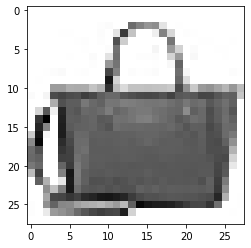

In [17]:
model.evaluate(val_scaled, val_target)

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [18]:
preds= model.predict(val_scaled[0:1])
print(preds)

[[3.5411718e-15 1.9058575e-22 2.9875432e-16 5.7930056e-18 6.2017317e-16
  1.1245881e-14 2.1988391e-15 6.6943740e-16 1.0000000e+00 1.8221905e-17]]


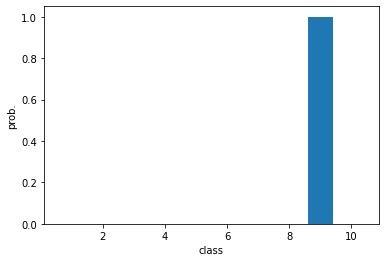

In [19]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [20]:
classes = ['티셔츠','바지','스워터','드레스','코드','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [21]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [22]:
test_scaled = test_input.reshape(-1, 28,28,1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2505 - accuracy: 0.9074


[0.25047767162323, 0.9074000120162964]

# 합성곱 신경망의 시각화 

## 가중치 시각화 

In [23]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [24]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [25]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.0011243143 0.20562062


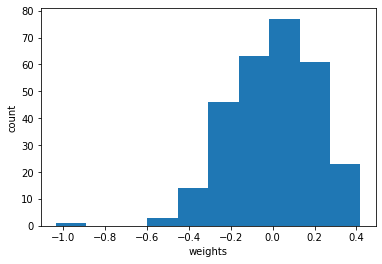

In [26]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

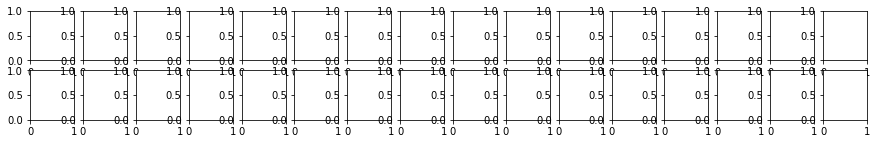

In [28]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

In [30]:
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [33]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation= \
                                          'relu', padding = 'same', input_shape=(28, 28,1)))

no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [36]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.006377675 0.08160352


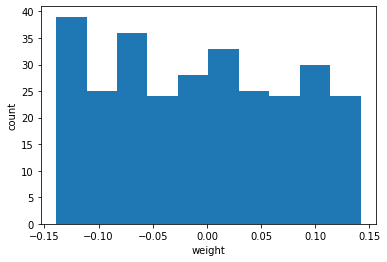

In [37]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

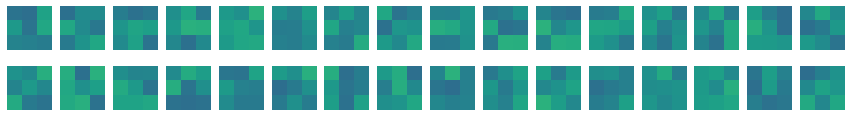

In [39]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
      axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin = -0.5,
                       vmax=0.5)
      axs[i, j].axis('off')

plt.show()

## 함수형 API

In [41]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [43]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화 

In [44]:
(train_input, train_target), (test_input, test_target)=\
    keras.datasets.fashion_mnist.load_data()

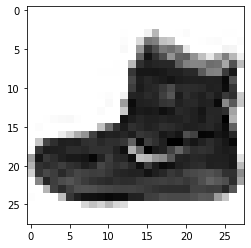

In [45]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [46]:
inputs = train_input[0:1].reshape(-1, 28, 28,1) / 255.0

feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

(1, 28, 28, 32)


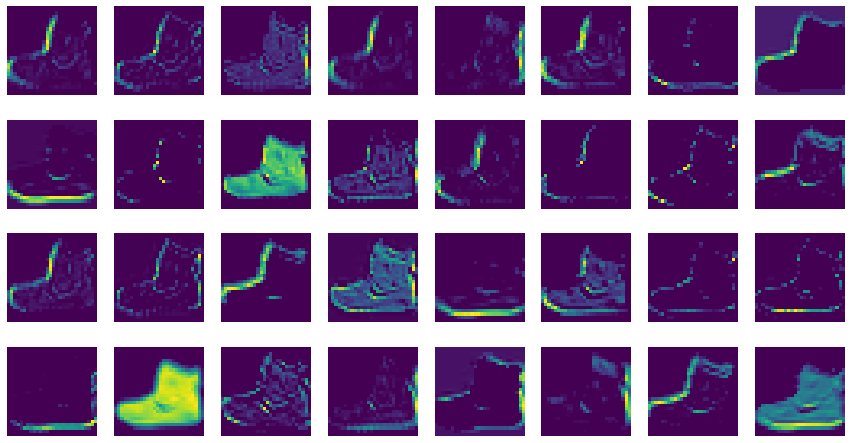

In [47]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
  for j in range(8):
      axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
      axs[i, j].axis('off')

plt.show()

In [48]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

print(feature_maps.shape)

(1, 14, 14, 64)


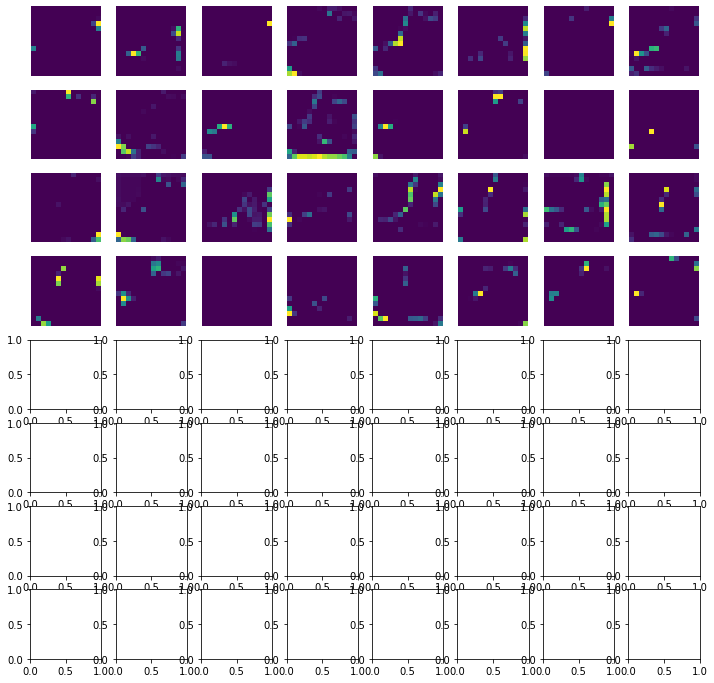

In [49]:
fig, axs =plt.subplots(8, 8, figsize=(12,12))

for i in range(4):
  for j in range(8):
      axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
      axs[i, j].axis('off')

plt.show()